In [2]:
import pandas as pd
import numpy as np
from numpy import unique
from numpy import where
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pickle

## Import data

In [5]:
data = pd.read_excel("../Dataset.xlsx")

In [6]:
data.head(5) #visualizing top 5 rows of the dataset

,Values,Activities,Category,Level of difficulty,Related mood
0,Citizenship/Community,Upcycling/Recycling old items,Valued activity,Easy,Lonely
1,Citizenship/Community,Participate in communal activities,Pleasure,Medium,Disconnected
2,Citizenship/Community,Making donations,Valued activity,Hard,Stressed
3,Citizenship/Community,Volunteering for a cause you support,Valued activity,Medium,Disconnected
4,Citizenship/Community,Donating old clothes or items to charity,Valued activity,Easy,Depressed


#### unique values

In [7]:
data["Level of difficulty"].unique()

array(['Easy', 'Medium', 'Hard', 'Very hard'], dtype=object)

In [8]:
data["Category"].unique()

array(['Valued activity', 'Pleasure', 'Mastery'], dtype=object)

In [9]:
data['Related mood '].unique()

array(['Lonely', 'Disconnected', 'Stressed', 'Depressed', 'Sluggish',
       'Uncreative', 'Feeling stuck', 'Anxious', 'Isolated', 'Burned-out',
       'Exhausted', 'Bored', 'Unproductive', 'Uncreative ', 'Self-doubt',
       'feeling stuck', 'Tired', 'Over-worked', 'Self-neglect',
       'Out-of-control', 'Drained', 'Unhealthy', 'Procrastination',
       'Hopeless'], dtype=object)

In [10]:
data["Values"].unique()

array(['Citizenship/Community', 'Employment', 'Family Relations',
       'Friendship/Social Relations', 'Hobbies',
       'Mental/Emotional Health', 'Personal Growth/Education',
       'Physical wellbeing', 'Spirituality', 'Self-care'], dtype=object)

## Data pre-processing


In [11]:
data.rename(columns={'Values':'values', "Activities":'activities', 'Category':'category', 'Level of difficulty':'level_of_difficulty', 'Related mood ':'related_mood'}, inplace=True)
#renaming columns

In [12]:
data.head()

,values,activities,category,level_of_difficulty,related_mood
0,Citizenship/Community,Upcycling/Recycling old items,Valued activity,Easy,Lonely
1,Citizenship/Community,Participate in communal activities,Pleasure,Medium,Disconnected
2,Citizenship/Community,Making donations,Valued activity,Hard,Stressed
3,Citizenship/Community,Volunteering for a cause you support,Valued activity,Medium,Disconnected
4,Citizenship/Community,Donating old clothes or items to charity,Valued activity,Easy,Depressed


##### Converting input variables to categorical type 

In [13]:
col =['values', 'category', 'level_of_difficulty', 'related_mood']  

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le_values = LabelEncoder()
data['values'] = le_values.fit_transform(data['values'])
data['values'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 9, 8])

In [16]:
le_cat = LabelEncoder()
data['category'] = le_cat.fit_transform(data['category'])
data['category'].unique()

array([2, 1, 0])

In [17]:
le_lod = LabelEncoder()
data['level_of_difficulty'] = le_lod.fit_transform(data['level_of_difficulty'])
data['level_of_difficulty'].unique()

array([0, 2, 1, 3])

In [18]:
le_rm = LabelEncoder()
data['related_mood'] = le_rm.fit_transform(data['related_mood'])
data['related_mood'].unique()

array([10,  4, 17,  3, 16, 19,  7,  0,  9,  2,  6,  1, 22, 20, 14, 23, 18,
       12, 15, 11,  5, 21, 13,  8])

In [19]:
data.sample(5)

,values,activities,category,level_of_difficulty,related_mood
36,3,Planning a nice surprise for someone else,2,2,4
66,4,Calligraphy,0,1,19
93,5,Bringing fresh flowers into the house,1,0,7
88,5,Reflecting on achievements,2,0,14
2,0,Making donations,2,1,17


##### Dividing the dataset into input variables and an output variable

In [20]:
X = data.drop(columns='activities')
y = data['activities']

In [21]:
X.head(5)

,values,category,level_of_difficulty,related_mood
0,0,2,0,10
1,0,1,2,4
2,0,2,1,17
3,0,2,2,4
4,0,2,0,3


In [22]:
y.head(5)


0               Upcycling/Recycling old items
1          Participate in communal activities
2                            Making donations
3        Volunteering for a cause you support
4    Donating old clothes or items to charity
Name: activities, dtype: object

##### Applying Principal Component Analysis for Visualisation

In [23]:
pca = PCA(2)
X_pca = pca.fit_transform(X)

## Data Analysis

##### Using distortion, silhoutte score and calinski_harabasz method for K-means and agglomerative clustering to select number of clusters

In [24]:
k = [i for i in range(2,15)] #finding optimal number of clusters between 2 and 15

In [25]:
import random
random.seed(42)

###### Distortion and kMeans

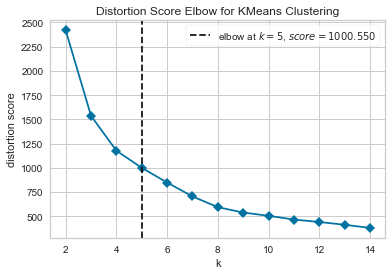

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
km = KMeans()
visualizer_kmm = KElbowVisualizer(km, k=k, timings= False)
visualizer_kmm.fit(X)        # Fit data to visualizer
visualizer_kmm.show()

###### Silhouette score and kMeans

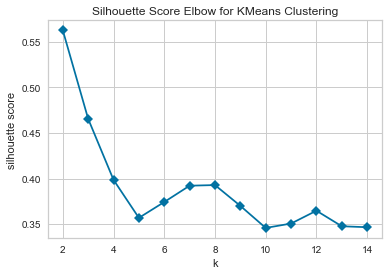

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [28]:
visualizer_kmm_ss = KElbowVisualizer(km, k=k, metric='silhouette', timings= False, locate_elbow= False)
visualizer_kmm_ss.fit(X)        # Fit the data to the visualizer
visualizer_kmm_ss.show() 

###### calinski_harabasz for kMeans

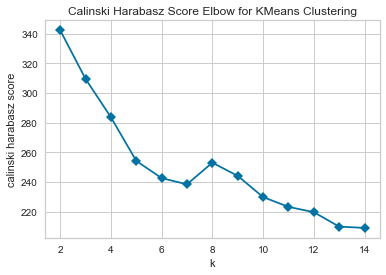

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [32]:
visualizer_kmm_ch = KElbowVisualizer(km, k=k, metric='calinski_harabasz', timings= False, locate_elbow= False)
visualizer_kmm_ch.fit(X)        # Fit the data to the visualizer
visualizer_kmm_ch.show() 

###### Distortion for agg

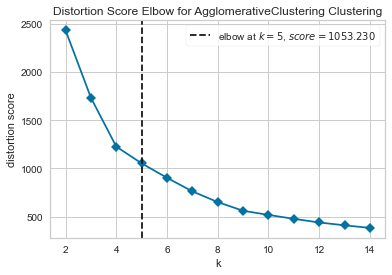

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
agg = AgglomerativeClustering()
visualizer_agg = KElbowVisualizer(agg, k=k, timings= False)
visualizer_agg.fit(X)        # Fit data to visualizer
visualizer_agg.show()

###### Silhouette score for agg

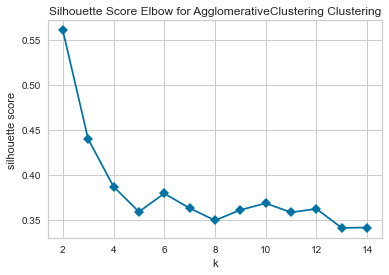

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [34]:
visualizer_agg_ss = KElbowVisualizer(agg, k=k, metric='silhouette', timings= False, locate_elbow='False')
visualizer_agg_ss.fit(X)        # Fit data to visualizer
visualizer_agg_ss.show()

###### calinski_harabasz for agg

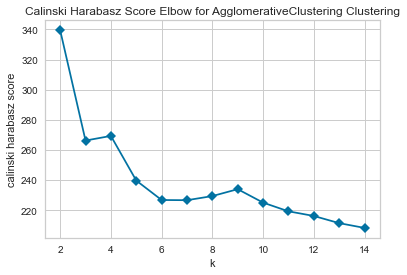

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [35]:
visualizer_agg_ch = KElbowVisualizer(agg, k=k, metric='calinski_harabasz', timings= False, locate_elbow='False')
visualizer_agg_ch.fit(X)        # Fit data to visualizer
visualizer_agg_ch.show()

## Data Modelling

### KMeans()

#### Clusters = 4

In [27]:
km_4 = KMeans(n_clusters=4, random_state=42) # initializing k-means 
km_cluster_4 = km_4.fit_predict(X) # model fit and predict
km_u_cluster_4 = np.unique(km_cluster_4) #unique number of clusters
centroids_4 = km_4.cluster_centers_ #centroids for plotting the graph

In [28]:
data["km4"]= pd.Series(km_cluster_4, index=data.index) #adding corresponding cluters to the dataset

#### Clusters = 5

In [29]:
km_5 = KMeans(n_clusters=5, random_state=42) # initializing k-means 
km_cluster_5 = km_5.fit_predict(X) # model fit and predict
km_u_cluster_5 = np.unique(km_cluster_5) #unique number of clusters
centroids_5 = km_5.cluster_centers_ #centroids for plotting the graph

In [30]:
data["km5"]= pd.Series(km_cluster_5, index=data.index) #adding corresponding cluters to the dataset

#### Clusters = 8

In [31]:
km_8 = KMeans(n_clusters=8, random_state=42) # initializing k-means 
km_cluster_8 = km_8.fit_predict(X) # model fit and predict
km_u_cluster_8 = np.unique(km_cluster_8) #unique number of clusters
centroids_8 = km_8.cluster_centers_ #centroids for plotting the graph

In [32]:
data["km8"]= pd.Series(km_cluster_8, index=data.index) #adding corresponding cluters to the dataset

In [33]:
data.head(3)

,values,activities,category,level_of_difficulty,related_mood,km4,km5,km8
0,0,Upcycling/Recycling old items,2,0,10,3,0,3
1,0,Participate in communal activities,1,2,4,1,3,1
2,0,Making donations,2,1,17,2,4,7


##### Visualising the clusters (KMeans)

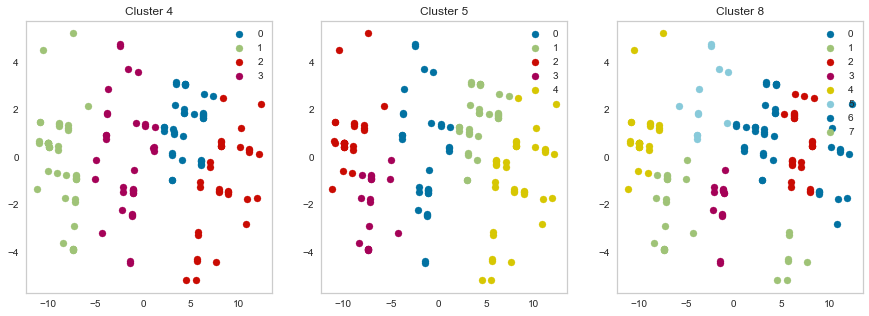

In [43]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15,5))

# cluster 4
ax1.title.set_text("Cluster 4")
for i in km_u_cluster_4: #Visualisation
    ax1.scatter(X_pca[km_cluster_4 == i, 0], X_pca[km_cluster_4 == i, 1], label = i)
ax1.grid(False)
ax1.legend(km_u_cluster_4)
#ax1.xlabel("PC1")
#ax1.ylabel("PC2")

# cluster 5
ax2.title.set_text("Cluster 5")
for i in km_u_cluster_5: #Visualisation
    ax2.scatter(X_pca[km_cluster_5== i, 0], X_pca[km_cluster_5 == i, 1], label = i)
ax2.grid(False)
ax2.legend(km_u_cluster_5)

# cluster 8
ax3.title.set_text("Cluster 8")
for i in km_u_cluster_8: #Visualisation
    ax3.scatter(X_pca[km_cluster_8== i, 0], X_pca[km_cluster_8 == i, 1], label = i)
ax3.grid(False)
ax3.legend(km_u_cluster_8)
plt.show()

### Agglomerative()

##### Cluster 4

In [34]:
agg_4 = AgglomerativeClustering(n_clusters=4)
agg_cluster_4 = agg_4.fit_predict(X)
agg_u_cluster_4 = np.unique(agg_cluster_4)

In [35]:
data["agg4"]= agg_cluster_4

##### Cluster 5

In [36]:
agg_5 = AgglomerativeClustering(n_clusters=5)
agg_cluster_5 = agg_5.fit_predict(X)
agg_u_cluster_5 = np.unique(agg_cluster_5)

In [37]:
data["agg5"]= agg_cluster_5

##### Cluster 8

In [38]:
agg_8 = AgglomerativeClustering(n_clusters=8)
agg_cluster_8 = agg_8.fit_predict(X)
agg_u_cluster_8 = np.unique(agg_cluster_8)
    

In [39]:
data["agg8"]= agg_cluster_8

##### Visualising the clusters (Agg)

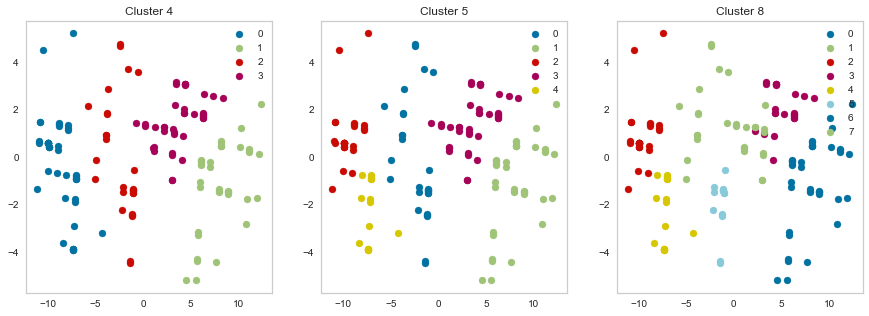

In [50]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15,5))

# cluster 4
ax1.title.set_text("Cluster 4")
for i in agg_u_cluster_4: #Visualisation
    ax1.scatter(X_pca[agg_cluster_4 == i, 0], X_pca[agg_cluster_4 == i, 1], label = i)
ax1.grid(False)
ax1.legend(agg_u_cluster_4)
#ax1.xlabel("PC1")
#ax1.ylabel("PC2")

# cluster 5
ax2.title.set_text("Cluster 5")
for i in agg_u_cluster_5: #Visualisation
    ax2.scatter(X_pca[agg_cluster_5== i, 0], X_pca[agg_cluster_5 == i, 1], label = i)
ax2.grid(False)
ax2.legend(agg_u_cluster_5)

# cluster 8
ax3.title.set_text("Cluster 8")
for i in agg_u_cluster_8: #Visualisation
    ax3.scatter(X_pca[agg_cluster_8== i, 0], X_pca[agg_cluster_8 == i, 1], label = i)
ax3.grid(False)
ax3.legend(agg_u_cluster_8)
plt.show()

### Gaussian Mixture Model()

##### Cluster 4

In [40]:
gmm_4 = GaussianMixture(n_components=4)
gmm_4.fit(X)
# assign each data point to a cluster
gmm_cluster_4 = gmm_4.predict(X)
# get all of the unique clusters
gmm_u_cluster_4 = unique(gmm_cluster_4 )

In [41]:
data["gmm4"]= gmm_cluster_4

##### Cluster 5

In [42]:
gmm_5 = GaussianMixture(n_components=5)
gmm_5.fit(X)
# assign each data point to a cluster
gmm_cluster_5 = gmm_5.predict(X)
# get all of the unique clusters
gmm_u_cluster_5 = unique(gmm_cluster_5 )

In [43]:
data["gmm5"]= gmm_cluster_5

##### Cluster 8

In [44]:
gmm_8 = GaussianMixture(n_components=8)
gmm_8.fit(X)
# assign each data point to a cluster
gmm_cluster_8 = gmm_8.predict(X)
# get all of the unique clusters
gmm_u_cluster_8 = unique(gmm_cluster_8 )

In [45]:
data["gmm8"]= gmm_cluster_8

##### Visualising the clusters (GMM)

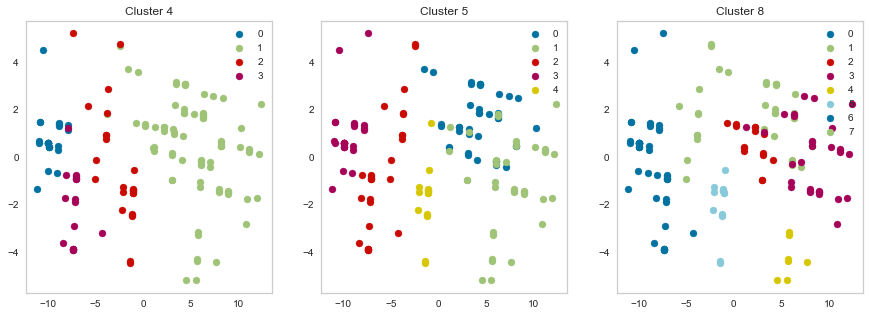

In [57]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15,5))

# cluster 4
ax1.title.set_text("Cluster 4")
for i in gmm_u_cluster_4: #Visualisation
    ax1.scatter(X_pca[gmm_cluster_4 == i, 0], X_pca[gmm_cluster_4 == i, 1], label = i)
ax1.grid(False)
ax1.legend(gmm_u_cluster_4)
#ax1.xlabel("PC1")
#ax1.ylabel("PC2")

# cluster 5
ax2.title.set_text("Cluster 5")
for i in gmm_u_cluster_5: #Visualisation
    ax2.scatter(X_pca[gmm_cluster_5== i, 0], X_pca[gmm_cluster_5 == i, 1], label = i)
ax2.grid(False)
ax2.legend(gmm_u_cluster_5)

# cluster 8
ax3.title.set_text("Cluster 8")
for i in gmm_u_cluster_8: #Visualisation
    ax3.scatter(X_pca[gmm_cluster_8== i, 0], X_pca[gmm_cluster_8 == i, 1], label = i)
ax3.grid(False)
ax3.legend(gmm_u_cluster_8)
plt.show()

In [58]:
data.head(3)

,values,activities,category,level_of_difficulty,related_mood,km4,km5,km8,agg4,agg5,agg8,gmm4,gmm5,gmm8
0,0,Upcycling/Recycling old items,2,0,10,3,0,3,2,0,5,2,4,5
1,0,Participate in communal activities,1,2,4,1,3,1,0,4,4,3,2,0
2,0,Making donations,2,1,17,2,4,7,1,1,0,1,1,4


## Model Comparison

##### Cluster 4

In [46]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score,silhouette_score

In [47]:
Cluster4 = data[["km4","agg4","gmm4"]]

In [48]:
Cluster4.head(10)

,km4,agg4,gmm4
0,3,2,0
1,1,0,2
2,2,1,3
3,1,0,2
4,1,0,2
5,1,0,2
6,3,2,0
7,1,0,2
8,2,1,3
9,1,0,2


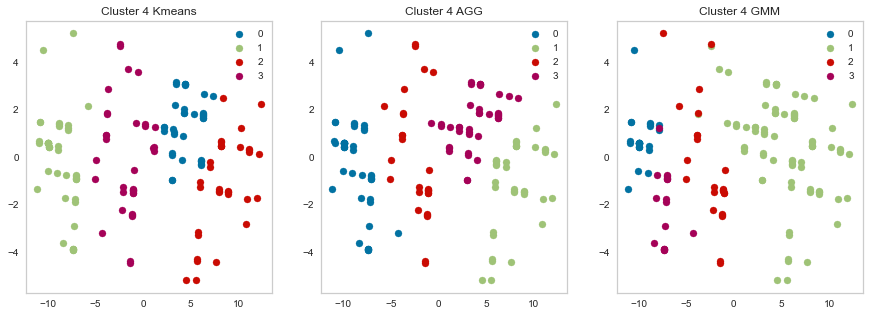

In [62]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15,5))

# cluster 4 KMeans
ax1.title.set_text("Cluster 4 Kmeans")
for i in km_u_cluster_4: #Visualisation
    ax1.scatter(X_pca[km_cluster_4 == i, 0], X_pca[km_cluster_4 == i, 1], label = i)
ax1.grid(False)
ax1.legend(km_u_cluster_4)
#ax1.xlabel("PC1")
#ax1.ylabel("PC2")

# cluster 4 AGG
ax2.title.set_text("Cluster 4 AGG")

for i in agg_u_cluster_4: #Visualisation
    ax2.scatter(X_pca[agg_cluster_4 == i, 0], X_pca[agg_cluster_4 == i, 1], label = i)
ax2.grid(False)
ax2.legend(agg_u_cluster_4)

# cluster 4 GMM
ax3.title.set_text("Cluster 4 GMM")
for i in gmm_u_cluster_4: #Visualisation
    ax3.scatter(X_pca[gmm_cluster_4== i, 0], X_pca[gmm_cluster_4 == i, 1], label = i)
ax3.grid(False)
ax3.legend(gmm_u_cluster_4)
plt.show()

##### Cluster 5

In [63]:
Cluster5 = data[["km5","agg5","gmm5"]]

In [64]:
Cluster5.head()

,km5,agg5,gmm5
0,0,0,4
1,3,4,2
2,4,1,1
3,3,4,2
4,3,4,2


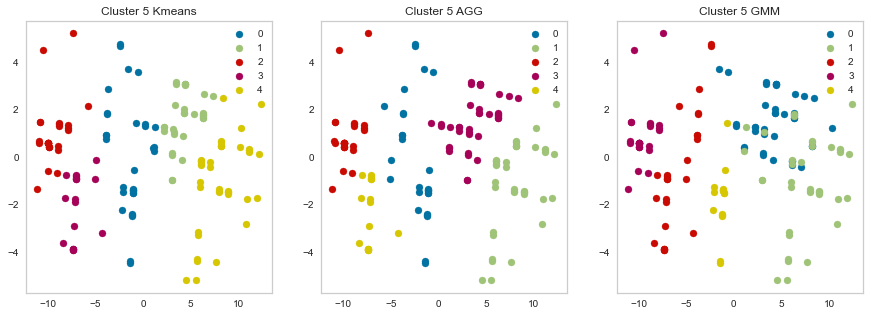

In [65]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15,5))

# cluster 5 KMeans
ax1.title.set_text("Cluster 5 Kmeans")
for i in km_u_cluster_5: #Visualisation
    ax1.scatter(X_pca[km_cluster_5 == i, 0], X_pca[km_cluster_5 == i, 1], label = i)
ax1.grid(False)
ax1.legend(km_u_cluster_5)
#ax1.xlabel("PC1")
#ax1.ylabel("PC2")

# cluster 5 AGG
ax2.title.set_text("Cluster 5 AGG")

for i in agg_u_cluster_5: #Visualisation
    ax2.scatter(X_pca[agg_cluster_5 == i, 0], X_pca[agg_cluster_5 == i, 1], label = i)
ax2.grid(False)
ax2.legend(agg_u_cluster_5)

# cluster 5 GMM
ax3.title.set_text("Cluster 5 GMM")
for i in gmm_u_cluster_5: #Visualisation
    ax3.scatter(X_pca[gmm_cluster_5== i, 0], X_pca[gmm_cluster_5 == i, 1], label = i)
ax3.grid(False)
ax3.legend(gmm_u_cluster_5)
plt.show()

##### Cluster 8

In [66]:
Cluster8 = data[["km8","agg8","gmm8"]]

In [67]:
Cluster8.head()

,km8,agg8,gmm8
0,3,5,5
1,1,4,0
2,7,0,4
3,1,4,0
4,1,4,0


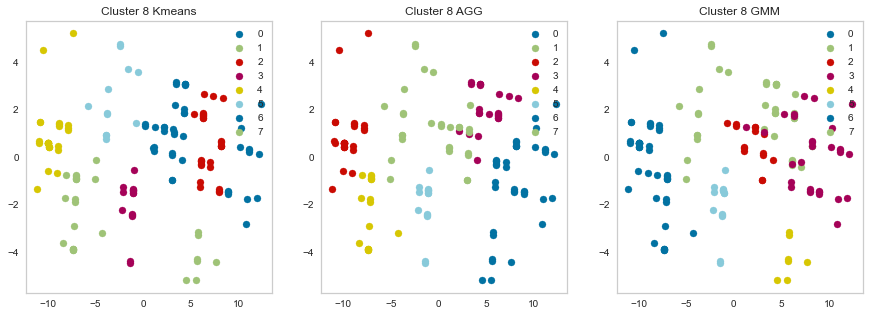

In [68]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15,5))

# cluster 8 KMeans
ax1.title.set_text("Cluster 8 Kmeans")
for i in km_u_cluster_8: #Visualisation
    ax1.scatter(X_pca[km_cluster_8 == i, 0], X_pca[km_cluster_8 == i, 1], label = i)
ax1.grid(False)
ax1.legend(km_u_cluster_8)
#ax1.xlabel("PC1")
#ax1.ylabel("PC2")

# cluster 8 AGG
ax2.title.set_text("Cluster 8 AGG")

for i in agg_u_cluster_8: #Visualisation
    ax2.scatter(X_pca[agg_cluster_8 == i, 0], X_pca[agg_cluster_8 == i, 1], label = i)
ax2.grid(False)
ax2.legend(agg_u_cluster_8)

# cluster 8 GMM
ax3.title.set_text("Cluster 8 GMM")
for i in gmm_u_cluster_8: #Visualisation
    ax3.scatter(X_pca[gmm_cluster_8== i, 0], X_pca[gmm_cluster_8 == i, 1], label = i)
ax3.grid(False)
ax3.legend(gmm_u_cluster_8)
plt.show()

###### Davies_bouldin_score for different clusters and different algorithms

In [49]:
DB = pd.DataFrame(pd.Series({"KMeans": davies_bouldin_score(X, km_cluster_4), "AGG": davies_bouldin_score(X, agg_cluster_4), "GMM": davies_bouldin_score(X, gmm_cluster_4)}, name='4'))
DB= pd.concat([DB, pd.Series({"KMeans": davies_bouldin_score(X, km_cluster_5), "AGG": davies_bouldin_score(X, agg_cluster_5), "GMM": davies_bouldin_score(X, gmm_cluster_5)}, name='5')], axis=1)
DB= pd.concat([DB, pd.Series({"KMeans": davies_bouldin_score(X, km_cluster_8), "AGG": davies_bouldin_score(X, agg_cluster_8), "GMM": davies_bouldin_score(X, gmm_cluster_8)}, name='8')], axis=1)

In [50]:
DB.T

,KMeans,AGG,GMM
4,0.930630,0.937445,0.981978
5,0.963713,0.935859,0.971968
8,0.887255,0.942869,1.154805


In [61]:
from matplotlib import pyplot as plt
import seaborn as sns


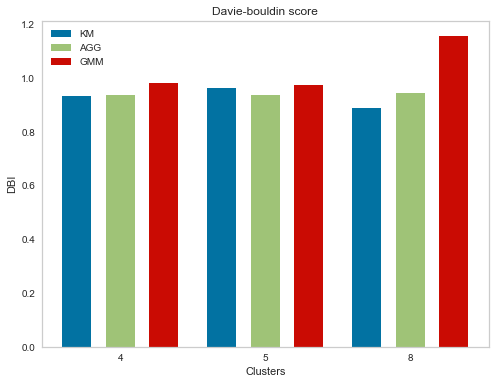

In [103]:
#DB["4"].values
I = ['4','5','8']
M4 = [0.930630,0.9637131, 0.887255]
M5 = [0.937445,0.935859,0.942869]
M8 = [0.981978, 0.971968,  1.154805]
X_axis = np.arange(len(I))
plt.figure(figsize=[8,6])  
plt.bar(X_axis - 0.3, M4, 0.2, label = 'KM')
plt.bar(X_axis , M5, 0.2, label = 'AGG')
plt.bar(X_axis + 0.3, M8, 0.2, label = 'GMM')  
plt.xticks(X_axis, I)
plt.xlabel("Clusters")
plt.ylabel("DBI")
plt.title("Davie-bouldin score")
plt.grid(b=None)
plt.legend()
plt.show()


###### calinski_harabasz_score for different clusters and different algorithms

In [51]:
CHS = pd.DataFrame(pd.Series({"KMeans": calinski_harabasz_score(X, km_cluster_4), "AGG": calinski_harabasz_score(X, agg_cluster_4), "GMM": calinski_harabasz_score(X, gmm_cluster_4)}, name='4'))
CHS = pd.concat([CHS, pd.Series({"KMeans": calinski_harabasz_score(X, km_cluster_5), "AGG": calinski_harabasz_score(X, agg_cluster_5), "GMM": calinski_harabasz_score(X, gmm_cluster_5)}, name='5')], axis=1)
CHS = pd.concat([CHS, pd.Series({"KMeans": calinski_harabasz_score(X, km_cluster_8), "AGG": calinski_harabasz_score(X, agg_cluster_8), "GMM": calinski_harabasz_score(X, gmm_cluster_8)}, name='8')], axis=1)

In [52]:
CHS.T

,KMeans,AGG,GMM
4,284.042615,269.284744,259.581544
5,253.369685,239.669602,234.842364
8,253.597956,229.370919,169.151654


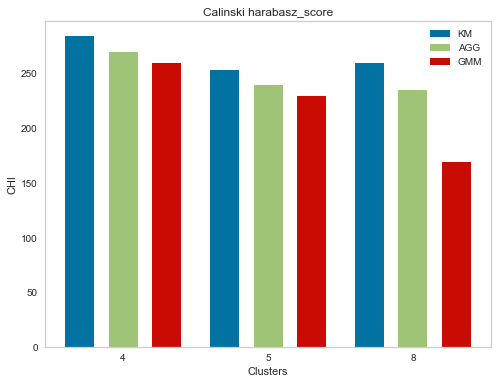

In [102]:
#DB["4"].values
I = ['4','5','8']
M4 = [284.042615,253.369685, 259.581544]
M5 = [269.284744,239.669602,234.842364]
M8 = [259.581544, 229.370919, 169.151654]
X_axis = np.arange(len(I))
plt.figure(figsize=[8,6])
plt.bar(X_axis - 0.3, M4, 0.2, label = 'KM')
plt.bar(X_axis , M5, 0.2, label = 'AGG')
plt.bar(X_axis + 0.3, M8, 0.2, label = 'GMM')  
plt.xticks(X_axis, I)
plt.xlabel("Clusters")
plt.ylabel("CHI")
plt.title("Calinski harabasz_score")
plt.grid(b=None)
plt.legend()
plt.show()

In [53]:
SS = pd.DataFrame(pd.Series({"KMeans": silhouette_score(X, km_cluster_4), "AGG": silhouette_score(X, agg_cluster_4), "GMM": silhouette_score(X, gmm_cluster_4)}, name='4'))
SS= pd.concat([SS, pd.Series({"KMeans": silhouette_score(X, km_cluster_5), "AGG": silhouette_score(X, agg_cluster_5), "GMM": silhouette_score(X, gmm_cluster_5)}, name='5')], axis=1)
SS= pd.concat([SS, pd.Series({"KMeans": silhouette_score(X, km_cluster_8), "AGG": silhouette_score(X, agg_cluster_8), "GMM": silhouette_score(X, gmm_cluster_8)}, name='8')], axis=1)

In [54]:
SS.T

,KMeans,AGG,GMM
4,0.398601,0.386759,0.375977
5,0.353303,0.358713,0.331879
8,0.391712,0.349142,0.286794


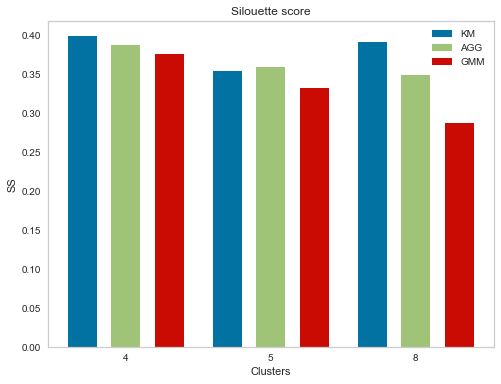

In [101]:
I = ['4','5','8']
M4 = [0.398601,0.353303, 0.391712]
M5 = [0.386759,0.358713	,0.349142]
M8 = [0.375977, 0.331879, 0.286794]
X_axis = np.arange(len(I))
plt.figure(figsize=[8,6])
plt.bar(X_axis - 0.3, M4, 0.2, label = 'KM')
plt.bar(X_axis , M5, 0.2, label = 'AGG')
plt.bar(X_axis + 0.3, M8, 0.2, label = 'GMM')  
plt.xticks(X_axis, I)
plt.xlabel("Clusters")
plt.ylabel("SS")
plt.title("Silouette score")
plt.grid(b=None)
plt.legend()
plt.show()

#### Saving the dataset


In [75]:
data.to_csv("BA_dataset.csv")

#### Saving the model

In [73]:
KM_new = {"recommender_4": km_4,"recommender_8": km_8, "le_values": le_values, "le_cat": le_cat, "le_lod": le_lod, "le_rm": le_rm}
with open('saved_steps_new.pkl', 'wb') as file:
    pickle.dump(KM_new, file)

In [126]:
with open('saved_steps.pkl', 'rb') as file:
    KM = pickle.load(file)
    
    